 1. Research Objective
The goal is to use the K-Nearest Neighbors Regressor to predict disease progression one year after baseline based on medical features such as age, BMI, blood pressure, and more.

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


2. Load and Understand the Dataset

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Convert to DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

# Display sample
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


 3. Train-Test Split and Feature Scaling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale the features (important for distance-based models like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4. KNN Regression Model Training

In [4]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regressor (e.g., k=5)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

5. Model Evaluation

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 3047.4499
R-squared Score: 0.4248


These results indicate that the K-Nearest Neighbors (KNN) regression model captures approximately 42.5% of the variance in disease progression, with an average squared prediction error of about 3047. While not extremely high, this is a decent baseline for a simple distance-based model applied to standardized medical data.

 6. Visualize Predictions vs Actual

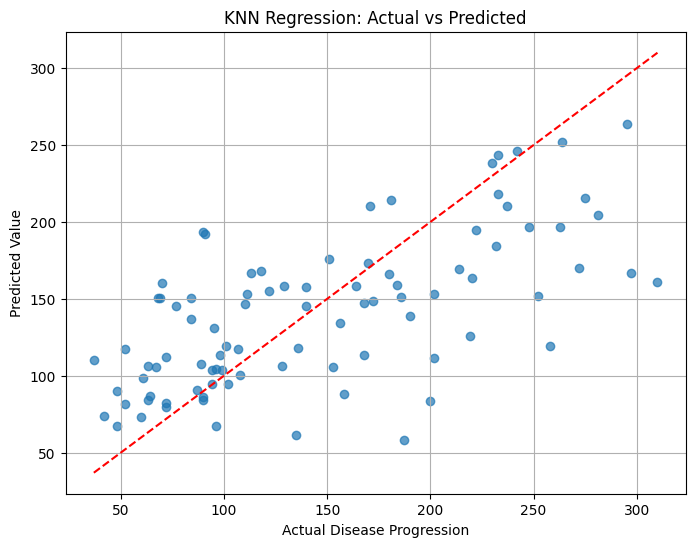

In [6]:
import matplotlib.pyplot as plt

# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Value")
plt.title("KNN Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


The scatter plot comparing actual vs. predicted values shows a generally upward trend, consistent with correct prediction directionality. However:

Many predictions fall below the red identity line, suggesting underestimation for higher disease progression values.

The spread increases for larger values, indicating the model is less confident in extreme cases.

This behavior is typical of KNN in regression, as its averaging nature tends to bias predictions toward the mean.

7. Hyperparameter Tuning (Best k)

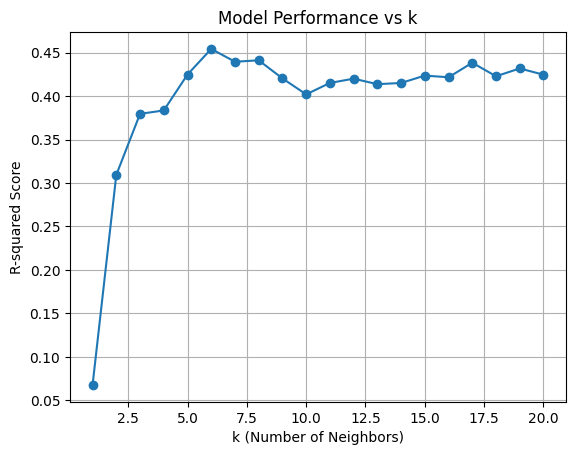

In [7]:
import numpy as np

# Try different values for k
k_values = list(range(1, 21))
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    r2_scores.append(r2_score(y_test, model.predict(X_test_scaled)))

# Plot R2 score vs k
plt.plot(k_values, r2_scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("R-squared Score")
plt.title("Model Performance vs k")
plt.grid(True)
plt.show()


The plot showing R² scores vs. number of neighbors (k) offers valuable insight:

Best performance occurs around k = 6, where R² ≈ 0.45.

Very small k (e.g., k=1) performs poorly due to overfitting.

R² stabilizes between k = 7 to 20, with only small performance drops, suggesting model robustness to choice of k in this range.

8. Conclusion
KNN regression provides a simple and interpretable method for predicting diabetes progression using standardized medical features.

While not highly accurate, the model delivers reasonable performance for a non-parametric baseline.

Hyperparameter tuning shows that k = 6 gives the best balance between underfitting and overfitting.